# Feature Selection
Feature selection involves selecting the most relevant features for the model.

#### Import Libraries

In [1]:
# Import Libraries
import pandas as pd  
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport 
from sklearn.feature_selection import VarianceThreshold
import gc
import warnings
warnings.filterwarnings('ignore')#remove the annoying warnings from our cells.
pd.set_option(f'display.max_columns', None) #Display all columns 
print(f'Imported Libraries Successfully!!')

Imported Libraries Successfully!!


Read in dhs data file

In [2]:
# downcast numeric values and read csv file in chunks
chunk_size = 5000  # Define chunk size
chunks = []# List to hold the processed chunks
file_path = '/kaggle/input/dhs-cleaned/dhs_cleaned.csv'
# Function to downcast numeric columns
def downcast_dtypes(df):
    # Downcast integer columns
    int_cols = df.select_dtypes(include=['int']).columns
    df[int_cols] = df[int_cols].apply(pd.to_numeric, downcast='integer')

    # Downcast float columns
    float_cols = df.select_dtypes(include=['float']).columns
    df[float_cols] = df[float_cols].apply(pd.to_numeric, downcast='float')

    return df

# Read and process the CSV file in chunks
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    # Process the chunk (replace with actual processing logic)
    processed_chunk = chunk
    
    # Downcast numeric columns to save memory
    processed_chunk = downcast_dtypes(processed_chunk)
    
    # Append the processed chunk to the list
    chunks.append(processed_chunk)
# Concatenate all chunks into a single DataFrame
dhs_data = pd.concat(chunks, ignore_index=True)
print('Successfully read dhs_cleaned.csv')

Successfully read dhs_cleaned.csv


Number of NaN for each columns

In [3]:
dhs_data.isnull().sum()

hhid         247
hv000        247
hv001          0
hv002          0
hv003        247
           ...  
hw72       66070
hw73       66070
ml1        65947
s423a      65846
mcaseid    65983
Length: 1963, dtype: int64

<Figure size 1000x600 with 0 Axes>

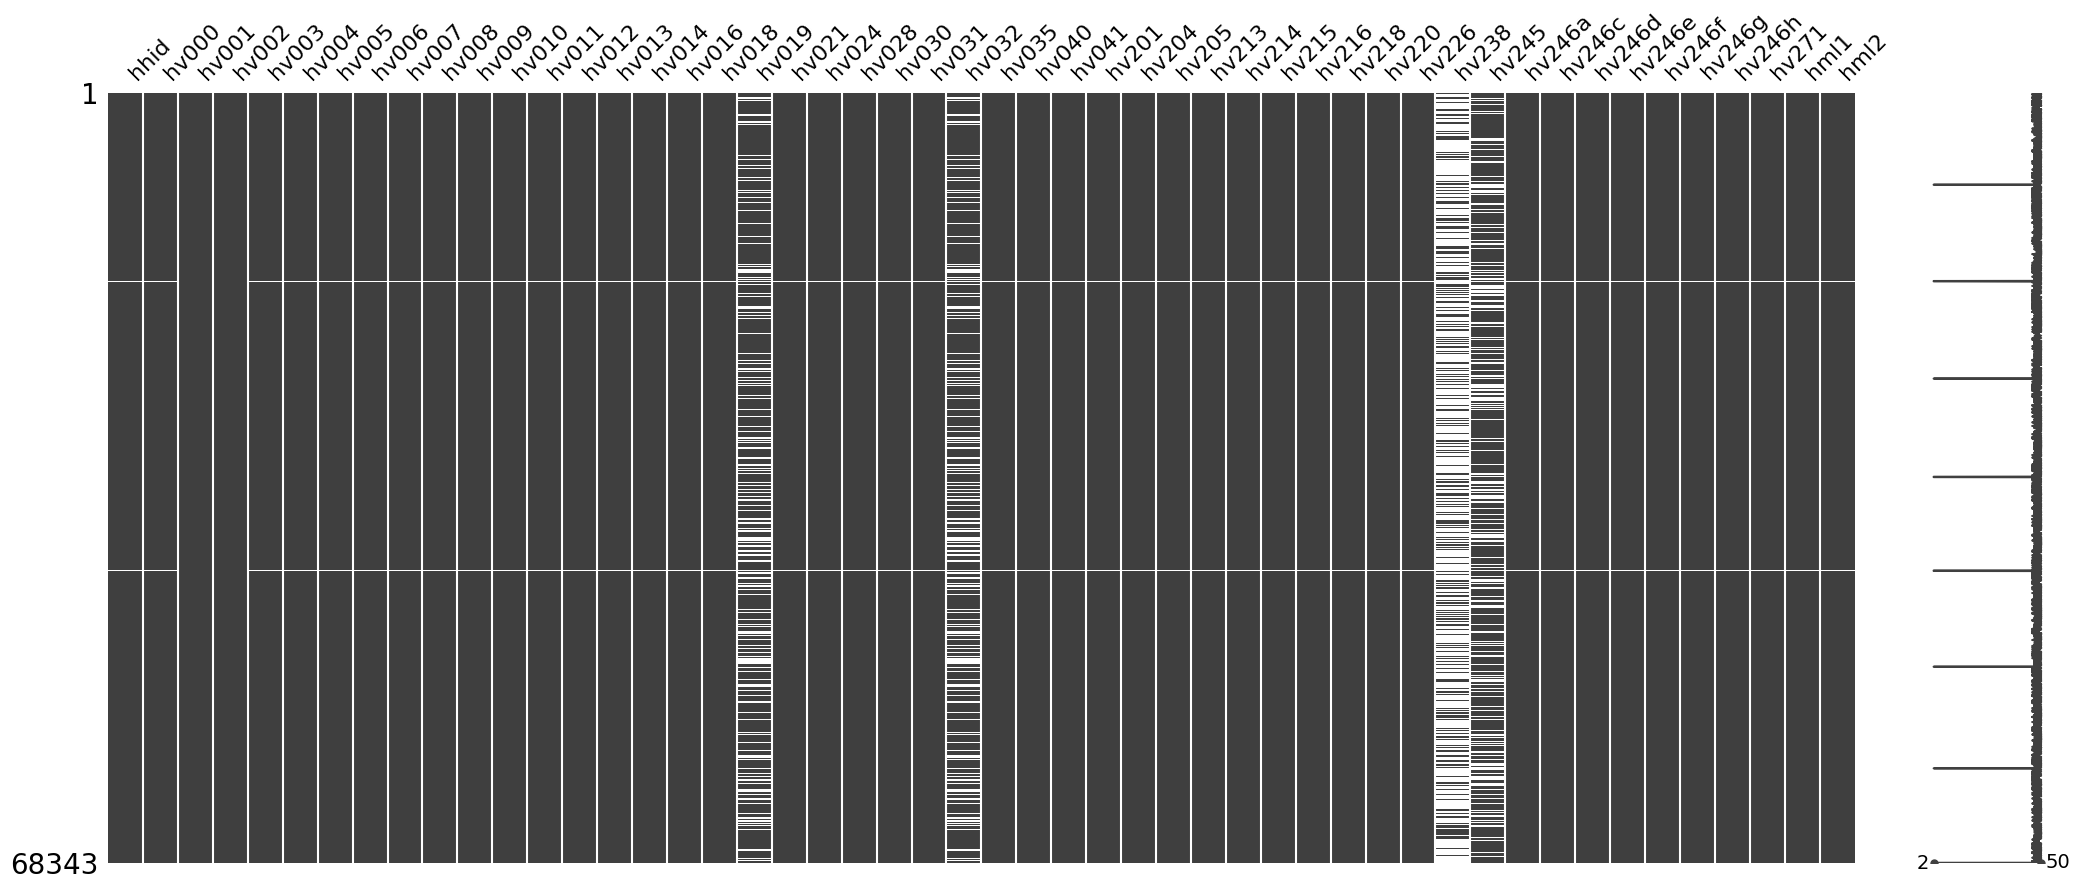

In [4]:
# Select the first 50 columns
first_50_columns = dhs_data.iloc[:, :50]
# Create a bar graph for missing data in the first 50 columns
plt.figure(figsize=(10, 6))
msno.matrix(first_50_columns)
plt.show()

Data summarization

In [5]:
dhs_data.describe()

hv001         hv002         hv003         hv004         hv005  \
count  68343.000000  68343.000000  68096.000000  68096.000000  6.809600e+04   
mean     377.535973     26.034268      1.599947    377.551239  1.014162e+06   
std      194.594636     18.808254      0.802190    194.588242  6.508131e+05   
min        1.000000      1.000000      1.000000      1.000000  4.244400e+04   
25%      223.000000      8.000000      1.000000    223.000000  5.224420e+05   
50%      386.000000     24.000000      2.000000    386.000000  1.030623e+06   
75%      540.000000     43.000000      2.000000    540.000000  1.328690e+06   
max      712.000000     61.000000     11.000000    712.000000  7.742462e+06   

              hv006    hv007         hv008         hv009         hv010  \
count  68096.000000  68096.0  68096.000000  68096.000000  68096.000000   
mean       5.089638     11.0    340.591766      5.134516      1.378260   
std        3.493093      0.0      1.656698      2.554488      0.897597   
min        0.000000     11.0    338.000000      0.000000      0.000000   
25%        1.000000     11.0    339.000000      3.000000      1.000000   
50%        7.000000     11.0    340.000000      5.000000      1.000000   
75%        8.000000     11.0    342.000000      7.000000      2.000000   
max        9.000000     11.0    344.000000      9.000000      7.000000   

              hv011         hv012         hv013         hv014         hv016  \
count  68096.000000  68096.000000  68096.000000  68096.000000  68096.000000   
mean       0.339212      5.129714      5.067096      1.498458      4.286023   
std        0.730017      2.531532      2.531814      1.148724      2.909008   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      3.000000      3.000000      1.000000      2.000000   
50%        0.000000      5.000000      5.000000      1.000000      4.000000   
75%        0.000000      7.000000      7.000000      2.000000      7.000000   
max        7.000000      9.000000      9.000000      6.000000      9.000000   

              hv018         hv019         hv021         hv024         hv028  \
count  68096.000000  52416.000000  68096.000000  68096.000000  6.809600e+04   
mean      44.289783      1.466651    377.551239      4.689468  3.175042e+05   
std       26.253805      1.281824    194.588242      2.853342  6.072598e+05   
min        0.000000      0.000000      1.000000      0.000000  0.000000e+00   
25%       23.000000      1.000000    223.000000      2.000000  0.000000e+00   
50%       43.000000      1.000000    386.000000      5.000000  0.000000e+00   
75%       63.000000      1.000000    540.000000      7.000000  4.360440e+05   
max       96.000000      9.000000    712.000000      9.000000  7.913031e+06   

              hv030         hv031         hv032         hv035         hv040  \
count  68096.000000  68096.000000  52416.000000  68096.000000  68096.000000   
mean      41.117893     41.900932      1.121165      0.401551    278.222229   
std       26.438177     26.395031      0.336171      0.832150    247.056473   
min        0.000000      1.000000      0.000000      0.000000      3.000000   
25%       20.000000     21.000000      1.000000      0.000000    105.000000   
50%       40.000000     41.000000      1.000000      0.000000    187.000000   
75%       60.000000     61.000000      1.000000      0.000000    356.000000   
max       90.000000     91.000000      3.000000      6.000000    992.000000   

              hv041         hv201         hv204         hv205         hv213  \
count  68096.000000  68096.000000  68096.000000  68096.000000  68096.000000   
mean       0.811839      3.558432     41.295040      2.367466      2.434548   
std        1.448766      1.250265     29.339014      1.075980      1.660229   
min        0.000000      1.000000      0.000000      1.000000      1.000000   
25%        0.000000      3.000000     20.000000      2.000000      1.000000   
50%        0.000000      

Data Structure

In [6]:
dhs_data.head(5)

hhid hv000  hv001  hv002  hv003  hv004      hv005  hv006  hv007  hv008  \
0    1 2    G6      1      2    1.0    1.0   821594.0    0.0   11.0  342.0   
1    1 2    G6      1      2    1.0    1.0   821594.0    0.0   11.0  342.0   
2  10029    G6    100     29    2.0  100.0  1112963.0    7.0   11.0  339.0   
3  10029    G6    100     29    2.0  100.0  1112963.0    7.0   11.0  339.0   
4  10029    G6    100     29    2.0  100.0  1112963.0    7.0   11.0  339.0   

   hv009  hv010  hv011  hv012  hv013  hv014  hv016  hv018  hv019  hv021  \
0    2.0    0.0    0.0    2.0    2.0    0.0    2.0   42.0    NaN    1.0   
1    2.0    0.0    0.0    2.0    2.0    0.0    2.0   42.0    NaN    1.0   
2    5.0    1.0    0.0    5.0    5.0    3.0    2.0   33.0    1.0  100.0   
3    5.0    1.0    0.0    5.0    5.0    3.0    2.0   33.0    1.0  100.0   
4    5.0    1.0    0.0    5.0    5.0    3.0    2.0   33.0    1.0  100.0   

   hv024  hv028  hv030  hv031  hv032  hv035  hv040  hv041  hv201  hv204  \
0    1.0    0.0   50.0   51.0    NaN    0.0  210.0    0.0    3.0    1.0   
1    1.0    0.0   50.0   51.0    NaN    0.0  210.0    0.0    3.0    1.0   
2    2.0    0.0   30.0   31.0    1.0    0.0  289.0    0.0    3.0   40.0   
3    2.0    0.0   30.0   31.0    1.0    0.0  289.0    0.0    3.0   40.0   
4    2.0    0.0   30.0   31.0    1.0    0.0  289.0    0.0    3.0   40.0   

   hv205  hv213  hv214  hv215  hv216  hv218  hv220  hv226  hv238  hv245  \
0    1.0    5.0    4.0    2.0    1.0    1.0    5.0    2.0    2.0   10.0   
1    1.0    5.0    4.0    2.0    1.0    1.0    5.0    2.0    2.0   10.0   
2    5.0    1.0    2.0    2.0    1.0    1.0    4.0    8.0    NaN    8.0   
3    5.0    1.0    2.0    2.0    1.0    1.0    4.0    8.0    NaN    8.0   
4    5.0    1.0    2.0    2.0    1.0    1.0    4.0    8.0    NaN    8.0   

   hv246a  hv246c  hv246d  hv246e  hv246f  hv246g  hv246h     hv271  hml1  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  209230.0   2.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0  209230.0   2.0   
2     2.0     0.0     0.0     0.0     4.0     4.0     0.0  -29839.0   4.0   
3     2.0     0.0     0.0     0.0     4.0     4.0     0.0  -29839.0   4.0   
4     2.0     0.0     0.0     0.0     4.0     4.0     0.0  -29839.0   4.0   

   hml2  shnumb2  shunhsel   shweigha  shqlang  shilang  shrlang  shstrth  \
0   0.0      7.0       NaN   748159.0      5.0      8.0      2.0      1.0   
1   0.0      7.0       NaN   748159.0      5.0      8.0      2.0      1.0   
2   0.0     60.0       NaN  1067814.0      2.0      2.0      2.0      9.0   
3   0.0     60.0       NaN  1067814.0      2.0      2.0      2.0      9.0   
4   0.0     60.0       NaN  1067814.0      2.0      2.0      2.0      9.0   

   shstrtm  shendh  shendm  hvidx_01  hvidx_02  hvidx_03  hvidx_04  hvidx_05  \
0      6.0     2.0     4.0       1.0       2.0       NaN       NaN       NaN   
1      6.0     2.0     4.0       1.0       2.0       NaN       NaN       NaN   
2      9.0     9.0     8.0       1.0       2.0       3.0       4.0       5.0   
3      9.0     9.0     8.0       1.0       2.0       3.0       4.0       5.0   
4      9.0     9.0     8.0       1.0       2.0       3.0       4.0       5.0   

   hvidx_06  hvidx_07  hvidx_08  hvidx_09  hvidx_10  hvidx_11  hvidx_12  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

   hvidx_13  hvidx_14  hvidx_15  hvidx_16  hvidx_17  hvidx_18  hvidx_19  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3       NaN       NaN   

Data shape

In [7]:
dhs_data.shape

(68343, 1963)

Identify columns with a single unique value, select those columns from the DataFrame and drop them

In [8]:
# Identify columns with a single unique value
single_value_columns = [col for col in dhs_data.columns if dhs_data[col].nunique() == 1]

# Select those columns
df_single_value = dhs_data[single_value_columns].head(5)
# Count those columns
count_single_value_columns = len(single_value_columns)

# Drop columns with a single unique value
dhs_data_dropped = dhs_data.drop(columns=single_value_columns)

print(f"Dropped {count_single_value_columns} columns with a single unique value")

# Data shape after dropping columns with a single unique value
shape = dhs_data_dropped.shape
print(f"Number of columns and rows after dropping  unique value: {shape}")

Dropped 278 columns with a single unique value
Number of columns and rows after dropping  unique value: (68343, 1685)


Calculate the threshold for missing values (35% of the total number of rows). And, drop columns that exceed this threshold.

In [9]:
# Calculate the threshold for missing values (35% of the total number of rows)
threshold = len(dhs_data_dropped) * 0.35
# Identify columns with more than 35% missing values
cols_with_35_pct_missing = [col for col in dhs_data_dropped.columns if dhs_data_dropped[col].isna().sum() > threshold]

# Count those columns
count_35_threshold_columns = len(cols_with_35_pct_missing)

print(f"Number of  columns with a single unique value: {count_35_threshold_columns}")

# Drop columns with more than 35% missing values
dhs_data_thresh = dhs_data_dropped.dropna(thresh=len(dhs_data_dropped) - threshold, axis=1)

print("DataFrame after dropping columns with more than 35% missing values:")
# Data shape after dropping columns with more than 35% missing values
shape = dhs_data_thresh.shape
print(f"Shape after dropping  columns with more than 35% missing values: {shape}")

Number of  columns with a single unique value: 1566
DataFrame after dropping columns with more than 35% missing values:
Shape after dropping  columns with more than 35% missing values: (68343, 119)


Select columns with numeric data types because they are fit for imputation

In [10]:
# select columns with numeric values
df_numeric = dhs_data_thresh.select_dtypes(exclude=['object'])
# Data shape with numeric values
shape = df_numeric.shape
print(f"Shape with numeric values: {shape}")

Shape with numeric values: (68343, 118)


Using correlation matrix method,identify and remove highly correlated features.

In [11]:
# Calculate the correlation matrix
corr_matrix = df_numeric.corr().abs()

# Select the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop features
dhs_data_threshed = df_numeric.drop(columns=to_drop)
# Data shape after dropping columns with correlation greater than 0.9
shape = dhs_data_threshed.shape
print(f"Shape after dropping columns with correlation greater than 0.9: {shape}")

Shape after dropping columns with correlation greater than 0.9: (68343, 97)


Remove features with low variance, as they do not provide much information.

In [12]:
selector = VarianceThreshold(threshold=0.1)  # Set threshold
dhs_data_threshed_reduced = selector.fit_transform(dhs_data_threshed)

# Get the columns that are kept
columns_kept = dhs_data_threshed.columns[selector.get_support(indices=True)]
dhs_data_variance = dhs_data_threshed[columns_kept]
# Data shape after dropping columns with vaiance less than 0.1
shape = dhs_data_variance.shape
print(f"Shape after dropping columns with vaiance less than 0.1: {shape}")

Shape after dropping columns with vaiance less than 0.1: (68343, 91)


Drop rows with duplicates

In [13]:
# Drop duplicates
dhs_data_no_duplicates = dhs_data_variance.drop_duplicates()
# Data shape after dropping columns with vaiance less than 0.1
shape = dhs_data_no_duplicates.shape
print(f"Shape with no duplicates: {shape}")

Shape with no duplicates: (45096, 91)
